In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

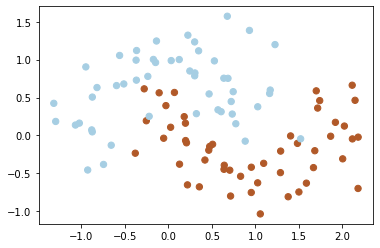

In [2]:
# generate and plot data
X, y = make_moons(noise=0.3, random_state=0)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)


plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()



sklearn.ensemble.AdaBoostClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

1. ***base_estimator*** object, default=None:  The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1).
1. ***n_estimators*** int, default=50: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.


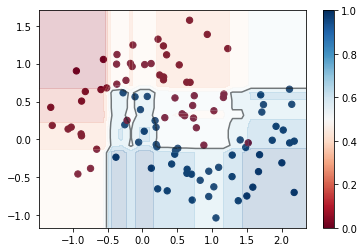

In [3]:
# fit AdaBoost with DecisionStump (1R) 
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50)

clf.fit(X,y)

# visualize data and prediction

cm = plt.cm.RdBu

# plot data points
scatter=plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=cm)


# plot decision boundary/maximum margin hyperplane and margins
#  (xlim, ylim, xx, yy... refer to the axes, not the input and output of the classifier)
# get axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#  create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# run classifier for all points in the mesh
Z = clf.decision_function(xy).reshape(XX.shape)

# plot prediction and decision boundary
ax.contourf(XX, YY, Z, cmap=cm,  alpha=0.2)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

plt.colorbar()

plt.show()

In [4]:
len(clf.estimators_)

50

In [5]:
clf.estimator_errors_

array([0.2       , 0.29316829, 0.27998034, 0.32015307, 0.22326213,
       0.2569185 , 0.27922171, 0.28940014, 0.1199556 , 0.24348342,
       0.26420416, 0.33786673, 0.17619774, 0.26535592, 0.28957072,
       0.35192149, 0.31166383, 0.26945617, 0.26752757, 0.27768632,
       0.27831595, 0.18388109, 0.29099666, 0.32268553, 0.32286398,
       0.26712324, 0.18915437, 0.29476367, 0.30900879, 0.21001301,
       0.30956748, 0.3197593 , 0.34325432, 0.28170846, 0.32213282,
       0.3930738 , 0.38788972, 0.35717053, 0.29490849, 0.24890456,
       0.2446013 , 0.35548567, 0.18116446, 0.17571408, 0.26767878,
       0.27960928, 0.20230563, 0.28051569, 0.30312714, 0.27132617])

In [6]:
clf.score(X,y)

1.0

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.85, 0.9 , 0.8 , 0.95, 0.95])

In [8]:
scores.mean()

0.89